## Fourier Neural Operator 1D

In [1]:
## Imports 
import math
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import torch.nn as nn
from torch.nn import init
from timeit import default_timer

c:\Users\s1612415\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## Set seeds
torch.manual_seed(0)
np.random.seed(0)

## Create Data

### Heat Equation:

\begin{align*}
\frac{\partial u}{\partial t} &= \alpha \frac{\partial^2 u}{\partial x^2} \\
u(x, 0) &= x^2 \\
u(0, t) &= u(1, t) = 2 - \exp(-t)
\end{align*}

Solution: 


In [3]:
## TODO: Create Heat Equation Class

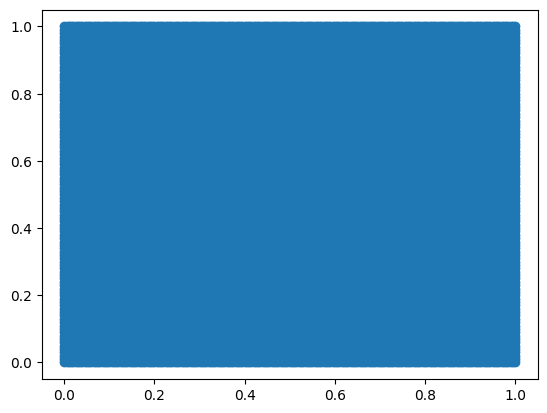

In [4]:
## Steps in x direction
nx = 200
## Steps in t direction
nt = 100

h = 1 / nx ## Step size in x direction
k = 1 / nt ## Step size in t direction

alpha = 0.05
r =  alpha * k / h**2

X, T = np.meshgrid(np.linspace(0, 1, nx + 1), np.linspace(0, 1, nt + 1))

plt.scatter(X, T)
plt.show()

In [5]:
## Initial Condition
beta = np.pi
u0 = np.sin(beta * X[0]) 

## Boundary Conditions
ux0 = 0 # u0[0] # T[:, 0]
uxn = 0 # u0[-1] # 2 - np.exp(-T[:, -1])

In [6]:
A = np.zeros((nx - 1, nx - 1))
B = np.zeros((nx - 1, nx - 1))

for i in range(nx - 1):
    A[i, i] = 2 + 2 * r
    B[i, i] = 2 - 2 * r

for i in range(nx - 2):
    A[i + 1, i] = -r
    A[i, i + 1] = -r
    B[i + 1, i] = r
    B[i, i + 1] = r

Ainv = np.linalg.inv(A)

In [7]:
## Compute Solution
u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

# b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    # b[0] = r * u[j - 1, 0] + r * u[j, 0]
    # b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx])) # + b)

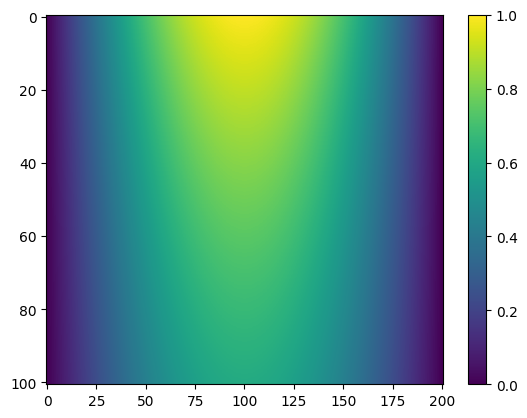

In [8]:
plt.imshow(u, aspect='auto')
plt.colorbar()
plt.show()

In [9]:
## Number of Samples 
n = 10000
## Output
data_in = []
data_out = []

## Generate Data
for _ in range(n):
    beta = np.random.uniform(-10, 10)
    beta_vec = beta * np.ones(201) ##

    u0 = np.sin(beta * X[0])

    data_in.append([beta_vec , np.arange(0, 1.005, 0.005)]) ## 

    ## Create Solution Matrix
    u = np.zeros((nt + 1, nx + 1))
    u[0] = u0
    u[:, 0] = ux0
    u[:, -1] = uxn

    # b = np.zeros(nx - 1)
    for j in range(1, nt + 1):
        # b[0] = r * u[j - 1, 0] + r * u[j, 0]
        # b[-1] = r * u[j - 1, -1] + r * u[j, -1]
        u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx])) # + b)

    data_out.append(u[-1])

In [10]:
data_in = np.array(torch.tensor(data_in).float())
data_out = np.array(torch.tensor(data_out).float().unsqueeze(1))

C:\Users\s1612415\AppData\Local\Temp\ipykernel_19636\974941267.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  data_in = np.array(torch.tensor(data_in).float())


In [11]:
## Data Loader
from torch.utils.data import Dataset, DataLoader
import pandas as pd

class CustomDataset(Dataset):
    def __init__(self, t, x):
        self.t = t
        self.x = x

    def __len__(self):
        return len(self.t)
    
    def __getitem__(self, index):
        return self.t[index], self.x[index]

data = CustomDataset(data_in, data_out)

In [12]:
data[0][0]

array([[0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.976270

In [13]:
data[0][0].shape

(2, 201)

In [14]:
dataloader = DataLoader(data, batch_size=16, shuffle=True)

## Build Network

In [15]:
## Get Device for Training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device.')

Using cpu device.


In [16]:
## Fourier Integral Kernel 1D
class FourierIntegralKernel1D(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, modes: int):
        super(FourierIntegralKernel1D, self).__init__()
        '''
        '''
        self.in_channels = in_channels
        self.out_channels = out_channels 
        self.modes = modes 
        ## Set (random) weights for the linear transform
        # weights = torch.rand(self.modes, self.out_channels, self.in_channels, dtype=torch.cfloat) 
        # self.weights = nn.Parameter(weights / (self.in_channels * self.out_channels)) ## Optional: Scale weights
        
        self.n = in_channels
        self.m = int(np.sqrt(self.n))

        b = 0.1

        self.T1 = nn.Parameter(b * torch.rand(self.m, self.m, self.m, dtype=torch.cfloat))
        self.T2 = nn.Parameter(b * torch.rand(self.m, self.m, self.m, dtype=torch.cfloat))
        # self.T3 = nn.Parameter(b * torch.rand(self.m, self.m, self.m, dtype=torch.cfloat))
        # self.T4 = nn.Parameter(b * torch.rand(self.m, self.m, self.m, dtype=torch.cfloat))
        # self.T5 = nn.Parameter(b * torch.rand(self.m, self.m, self.m, dtype=torch.cfloat))
        # self.T6 = nn.Parameter(b * torch.rand(self.m, self.m, self.m, dtype=torch.cfloat))
        # self.T7 = nn.Parameter(b * torch.rand(self.m, self.m, self.m, dtype=torch.cfloat))
        # self.T8 = nn.Parameter(b * torch.rand(self.m, self.m, self.m, dtype=torch.cfloat))
 
        self.A1 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.A2 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.A3 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.A4 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.A5 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.A6 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.A7 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.A8 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))

        self.B1 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.B2 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.B3 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.B4 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.B5 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.B6 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.B7 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        self.B8 = nn.Parameter(b * torch.rand(self.m, self.m, dtype=torch.cfloat))
        
        self.perm = torch.zeros(self.n, self.n, dtype=torch.cfloat)
        for i in np.arange(0, self.m):
            for j in np.arange(0, self.m):
                row = torch.zeros(self.n)
                row[i + self.m*j] = 1
                self.perm[self.m*i + j] = row
                
        # self.reset_parameters()

    def reset_parameters(self):
        # Mimic init.kaiming_uniform: https://github.com/pytorch/pytorch/blob/24087d07ca7ffa244575d259711dd7c99245a67a/torch/nn/init.py#L360
        # for i in [
        #     self.T1, self.T2, self.T3, self.T4,# self.T5, self.T6, self.T7, self.T8,
        #     self.A1, self.A2, self.A3, self.A4,# self.A5, self.A6, self.A7, self.A8,
        #     self.B1, self.B2, self.B3, self.B4#, self.B5, self.B6, self.B7, self.B8
        # ]:
        #     fan_in = i.shape[-1]
        #     gain = init.calculate_gain(nonlinearity='relu')
        #     std = gain / math.sqrt(fan_in)
        #     bound = math.sqrt(3.0) * std  # Calculate uniform bounds from standard deviation
        #     with torch.no_grad():
        #         i.uniform_(-bound, bound)
        for i in [
            self.T1, self.T2, self.T3, self.T4, self.T5, self.T6, self.T7, self.T8
        ]:
            i / (self.m * self.m)
        for i in [
            self.A1, self.A2, self.A3, self.A4, self.A5, self.A6, self.A7, self.A8,
            self.B1, self.B2, self.B3, self.B4, self.B5, self.B6, self.B7, self.B8
        ]:
            i / self.m

    def blockdiag_T(self):
        T = torch.zeros(self.modes, self.n, self.n, dtype=torch.cfloat)
        T[:self.m, :self.m, :self.m] = self.T1
        T[self.m:2*self.m, self.m:2*self.m, self.m:2*self.m] = self.T2
        # T[2*self.m:3*self.m, 2*self.m:3*self.m, 2*self.m:3*self.m] = self.T3
        # T[3*self.m:4*self.m, 3*self.m:4*self.m, 3*self.m:4*self.m] = self.T4
        # T[4*self.m:5*self.m, 4*self.m:5*self.m, 4*self.m:5*self.m] = self.T5
        # T[5*self.m:6*self.m, 5*self.m:6*self.m, 5*self.m:6*self.m] = self.T6
        # T[6*self.m:7*self.m, 6*self.m:7*self.m, 6*self.m:7*self.m] = self.T7
        # T[7*self.m:8*self.m, 7*self.m:8*self.m, 7*self.m:8*self.m] = self.T8
        return T
        
    def blockdiag_A(self):
        A = torch.zeros(self.n, self.n, dtype=torch.cfloat)
        A[:self.m, :self.m] = self.A1
        A[self.m:2*self.m, self.m:2*self.m] = self.A2
        A[2*self.m:3*self.m, 2*self.m:3*self.m] = self.A3
        A[3*self.m:4*self.m, 3*self.m:4*self.m] = self.A4
        A[4*self.m:5*self.m, 4*self.m:5*self.m] = self.A5
        A[5*self.m:6*self.m, 5*self.m:6*self.m] = self.A6
        A[6*self.m:7*self.m, 6*self.m:7*self.m] = self.A7
        A[7*self.m:8*self.m, 7*self.m:8*self.m] = self.A8
        return A

    def blockdiag_B(self):
        B = torch.zeros(self.n, self.n, dtype=torch.cfloat)
        B[:self.m, :self.m] = self.B1
        B[self.m:2*self.m, self.m:2*self.m] = self.B2
        B[2*self.m:3*self.m, 2*self.m:3*self.m] = self.B3
        B[3*self.m:4*self.m, 3*self.m:4*self.m] = self.B4
        B[4*self.m:5*self.m, 4*self.m:5*self.m] = self.B5
        B[5*self.m:6*self.m, 5*self.m:6*self.m] = self.B6
        B[6*self.m:7*self.m, 6*self.m:7*self.m] = self.B7
        B[7*self.m:8*self.m, 7*self.m:8*self.m] = self.B8
        return B
        
    def forward(self, v: torch.Tensor) -> torch.Tensor:
        '''
        FFT -> Linear Transform -> Inverse FFT
        '''
        PAPT = torch.einsum('ik, jkl -> jil', self.perm@self.blockdiag_A()@self.perm, self.blockdiag_T())
        PBPT = torch.einsum('il, jkl -> jik', self.perm@self.blockdiag_B()@self.perm, PAPT)

        ## FFT
        v_rfft = torch.fft.rfft(v) 
        
        ## Linear Transform 
        lv_rfft = torch.zeros(v_rfft.shape, dtype=torch.cfloat)
        lv_rfft[:, :, :self.modes] = torch.einsum('koi, bki -> bko', PBPT, v_rfft[:, :, :self.modes].permute(0, 2, 1)).permute(0, 2, 1) ## TODO: Should I have 5 dimensions here?
        
        ## Inverse FFT
        v2 = torch.fft.irfft(lv_rfft, n=v.shape[-1])
        return v2
        

In [17]:
## Fourier Network Operator 1D
class FourierNetworkOperator1D(nn.Module):
    def __init__(self, da: int, du: int, width: int, modes: int):
        super(FourierNetworkOperator1D, self).__init__()
        '''
        '''
        self.width = width
        self.modes = modes

        ## P: Lifts the lower dimensional function to higher dimensional space
        self.P = nn.Conv1d(da, self.width, 1) ## TODO: Change da

        ## K: Fourier integral kernel operator
        self.k0 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        self.k1 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        self.k2 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        self.k3 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k4 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k5 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k6 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k7 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k8 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k9 = FourierIntegralKernel1D(self.width, self.width, self.modes)

        ## W: Pointwise linear operator
        self.w0 = nn.Conv1d(self.width, self.width, 1)
        self.w1 = nn.Conv1d(self.width, self.width, 1)
        self.w2 = nn.Conv1d(self.width, self.width, 1)
        self.w3 = nn.Conv1d(self.width, self.width, 1)
        # self.w4 = nn.Conv1d(self.width, self.width, 1)
        # self.w5 = nn.Conv1d(self.width, self.width, 1)
        # self.w6 = nn.Conv1d(self.width, self.width, 1)
        # self.w7 = nn.Conv1d(self.width, self.width, 1)
        # self.w8 = nn.Conv1d(self.width, self.width, 1)
        # self.w9 = nn.Conv1d(self.width, self.width, 1)

        ## Q: Projects the higher dimensional function to lower dimensional space
        self.Q = nn.Conv1d(self.width, du, 1) ## TODO: Change du

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        '''
        '''
        ## P
        x = self.P(x)

        ## Fourier Layer #0
        ## K
        x1 = self.k0(x)
        ## W
        x2 = self.w0(x)
        ## Sum
        x = x1 + x2
        ## Gelu
        x = nn.functional.gelu(x)
        # x = nn.functional.gelu(x1)
        # x = nn.functional.gelu(x2)

        ## Fourier Layer #1
        ## K
        x1 = self.k1(x)
        ## W
        x2 = self.w1(x)
        ## Sum 
        x = x1 + x2
        ## Gelu
        x = nn.functional.gelu(x)
        # x = nn.functional.gelu(x1)
        # x = nn.functional.gelu(x2)

        ## Fourier Layer #2
        ## K
        x1 = self.k2(x)
        ## W
        x2 = self.w2(x)
        ## Sum
        x = x1 + x2
        ## Gelu
        x = nn.functional.gelu(x)
        # x = nn.functional.gelu(x1)
        # x = nn.functional.gelu(x2)

        ## Fourier Layer #3
        ## K
        x1 = self.k3(x)
        ## W
        x2 = self.w3(x)
        ## Sum
        x = x1 + x2
        ## Gelu
        x = nn.functional.gelu(x)
        # x = nn.functional.gelu(x1)
        # x = nn.functional.gelu(x2)

        # ## Fourier Layer #4
        # ## K
        # x1 = self.k4(x)
        # ## W
        # x2 = self.w4(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #5
        # ## K
        # x1 = self.k5(x)
        # ## W
        # x2 = self.w5(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #6
        # ## K
        # x1 = self.k6(x)
        # ## W
        # x2 = self.w6(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #7
        # ## K
        # x1 = self.k7(x)
        # ## W
        # x2 = self.w7(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #8
        # ## K
        # x1 = self.k8(x)
        # ## W
        # x2 = self.w8(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #9
        # ## K
        # x1 = self.k9(x)
        # ## W
        # x2 = self.w9(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        ## Q
        x = self.Q(x)
        return x


In [18]:
# import operator
# from functools import reduce

# def count_parameters(model):
#     c = 0
#     for p in list(model.parameters()):
#         c += reduce(operator.mul, list(p.size() + (2, ) if p.is_complex() else p.size()))
#     return c

# model = FourierNetworkOperator1D(2, 1, width=64, modes=4)
# print(f'Number of parameters: {count_parameters(model)}')

In [19]:
def count_parameters(model):
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        print(f'{name}: {params}')
        total_params+=params
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
model = FourierNetworkOperator1D(2, 1, width=64, modes=16)
num_parameters = count_parameters(model)

P.weight: 128
P.bias: 64
k0.T1: 512
k0.T2: 512
k0.A1: 64
k0.A2: 64
k0.A3: 64
k0.A4: 64
k0.A5: 64
k0.A6: 64
k0.A7: 64
k0.A8: 64
k0.B1: 64
k0.B2: 64
k0.B3: 64
k0.B4: 64
k0.B5: 64
k0.B6: 64
k0.B7: 64
k0.B8: 64
k1.T1: 512
k1.T2: 512
k1.A1: 64
k1.A2: 64
k1.A3: 64
k1.A4: 64
k1.A5: 64
k1.A6: 64
k1.A7: 64
k1.A8: 64
k1.B1: 64
k1.B2: 64
k1.B3: 64
k1.B4: 64
k1.B5: 64
k1.B6: 64
k1.B7: 64
k1.B8: 64
k2.T1: 512
k2.T2: 512
k2.A1: 64
k2.A2: 64
k2.A3: 64
k2.A4: 64
k2.A5: 64
k2.A6: 64
k2.A7: 64
k2.A8: 64
k2.B1: 64
k2.B2: 64
k2.B3: 64
k2.B4: 64
k2.B5: 64
k2.B6: 64
k2.B7: 64
k2.B8: 64
k3.T1: 512
k3.T2: 512
k3.A1: 64
k3.A2: 64
k3.A3: 64
k3.A4: 64
k3.A5: 64
k3.A6: 64
k3.A7: 64
k3.A8: 64
k3.B1: 64
k3.B2: 64
k3.B3: 64
k3.B4: 64
k3.B5: 64
k3.B6: 64
k3.B7: 64
k3.B8: 64
w0.weight: 4096
w0.bias: 64
w1.weight: 4096
w1.bias: 64
w2.weight: 4096
w2.bias: 64
w3.weight: 4096
w3.bias: 64
Q.weight: 64
Q.bias: 1
Total Trainable Params: 25089


In [20]:
PAPT = torch.einsum('ik, jkl -> jil', model.k0.perm@model.k0.blockdiag_A()@model.k0.perm, model.k0.blockdiag_T())
PBPT = torch.einsum('il, jkl -> jik', model.k0.perm@model.k0.blockdiag_B()@model.k0.perm, PAPT)
print(torch.mean(PBPT))
print(torch.std(PBPT))

tensor(-0.0002+0.0002j, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<StdBackward0>)


## Train

In [21]:
## Model Parameters
learning_rate = 1e-3
epochs = 5

In [22]:
## Loss Function
loss_function = nn.MSELoss()

In [23]:
## Optimizer 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
vec = torch.from_numpy(np.arange(0, 1.005, 0.005)).float().unsqueeze(0).unsqueeze(0) ##

beta: 6.143844901770926


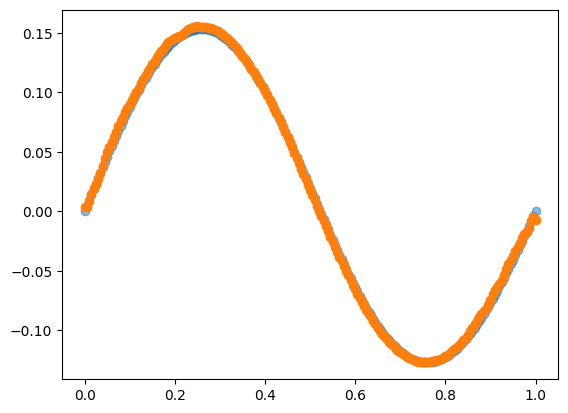

In [45]:
## Test 0
beta0 = np.random.uniform(-10, 10)
print(f'beta: {beta0}')
beta0_vec = torch.from_numpy(beta0 * np.ones(201)).float().unsqueeze(0).unsqueeze(0) ##

u0 = torch.from_numpy(np.sin(beta0 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta0_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta0_vec, vec), 1)).detach())
plt.show()

beta: 4.115054390602959


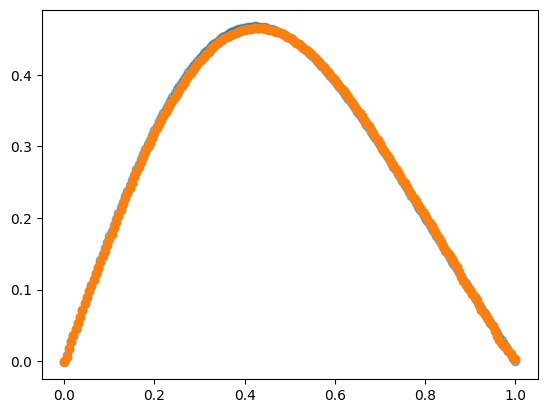

In [46]:
## Test 1
beta1 = np.random.uniform(-10, 10)
print(f'beta: {beta1}')
beta1_vec = torch.from_numpy(beta1 * np.ones(201)).float().unsqueeze(0).unsqueeze(0) ##

u0 = torch.from_numpy(np.sin(beta1 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta1_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta1_vec, vec), 1)).detach())
plt.show()

beta: -9.968876041407357


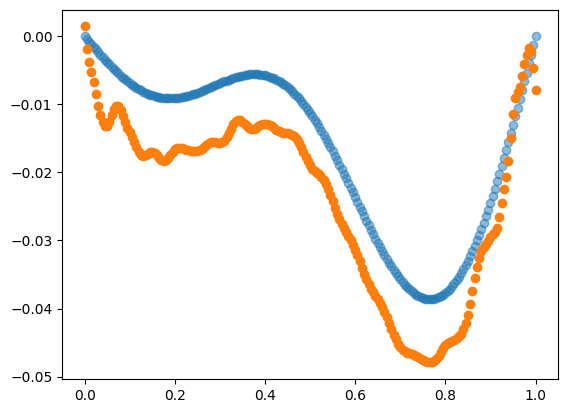

In [47]:
## Test 2
beta2 = np.random.uniform(-10, 10)
print(f'beta: {beta2}')
beta2_vec = torch.from_numpy(beta2 * np.ones(201)).float().unsqueeze(0).unsqueeze(0) ##

u0 = torch.from_numpy(np.sin(beta2 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta2_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta2_vec, vec), 1)).detach())
plt.show()

In [28]:
## Training Loop
def train_loop(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    for batch, (t, x) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(t)
        loss = loss_function(pred, x)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(t)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [29]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(dataloader, model, loss_function, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 0.053159  [    0/10000]
loss: 0.015115  [ 1600/10000]
loss: 0.002898  [ 3200/10000]
loss: 0.000903  [ 4800/10000]
loss: 0.000249  [ 6400/10000]
loss: 0.000132  [ 8000/10000]
loss: 0.000047  [ 9600/10000]
Epoch 2
-------------------------------
loss: 0.000030  [    0/10000]
loss: 0.000060  [ 1600/10000]
loss: 0.000014  [ 3200/10000]
loss: 0.000021  [ 4800/10000]
loss: 0.000208  [ 6400/10000]
loss: 0.000030  [ 8000/10000]
loss: 0.000051  [ 9600/10000]
Epoch 3
-------------------------------
loss: 0.000082  [    0/10000]
loss: 0.000026  [ 1600/10000]
loss: 0.000103  [ 3200/10000]
loss: 0.000022  [ 4800/10000]
loss: 0.000107  [ 6400/10000]
loss: 0.000071  [ 8000/10000]
loss: 0.000066  [ 9600/10000]
Epoch 4
-------------------------------
loss: 0.000021  [    0/10000]
loss: 0.000055  [ 1600/10000]
loss: 0.000057  [ 3200/10000]
loss: 0.000005  [ 4800/10000]
loss: 0.000059  [ 6400/10000]
loss: 0.000029  [ 8000/10000]
loss: 0.000012  [ 9600/10000]


## Test

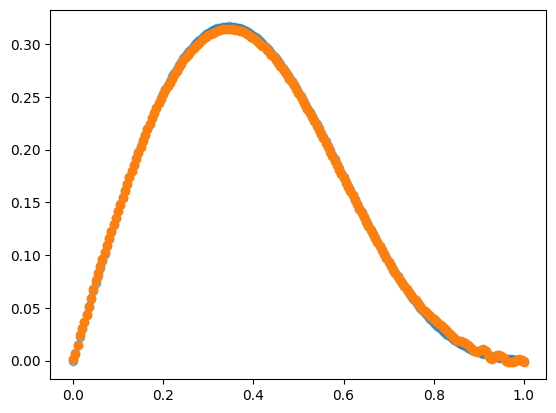

In [30]:
## Test 0
u0 = torch.from_numpy(np.sin(beta0 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta0_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta0_vec, vec), 1)).detach())
plt.show()

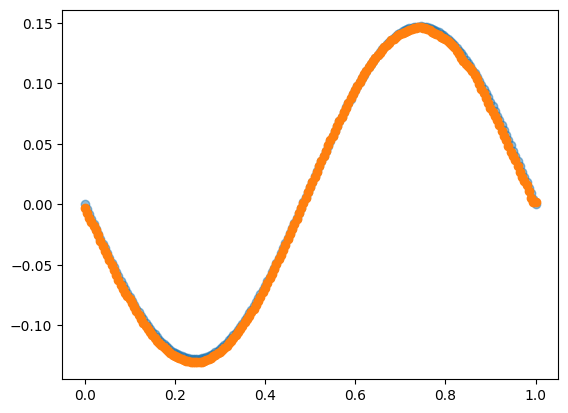

In [31]:
## Test 1
u0 = torch.from_numpy(np.sin(beta1 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta1_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta1_vec, vec), 1)).detach())
plt.show()

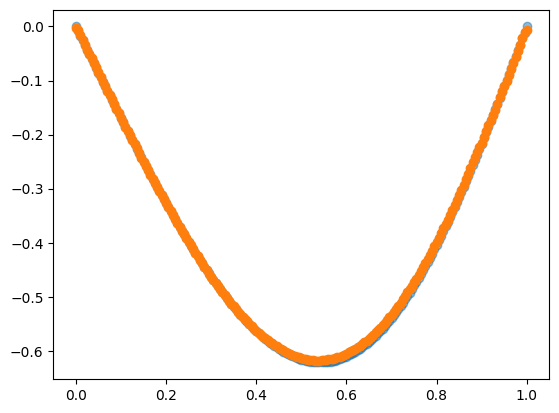

In [32]:
## Test 2
u0 = torch.from_numpy(np.sin(beta2 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta2_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta2_vec, vec), 1)).detach())
plt.show()

### What does the Fourier Layer do?

In [33]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.k0.register_forward_hook(get_activation('k0'))
model.w0.register_forward_hook(get_activation('w0'))
model.k1.register_forward_hook(get_activation('k1'))
model.w1.register_forward_hook(get_activation('w1'))
model.k2.register_forward_hook(get_activation('k2'))
model.w2.register_forward_hook(get_activation('w2'))
model.k3.register_forward_hook(get_activation('k3'))
model.w3.register_forward_hook(get_activation('w3'))

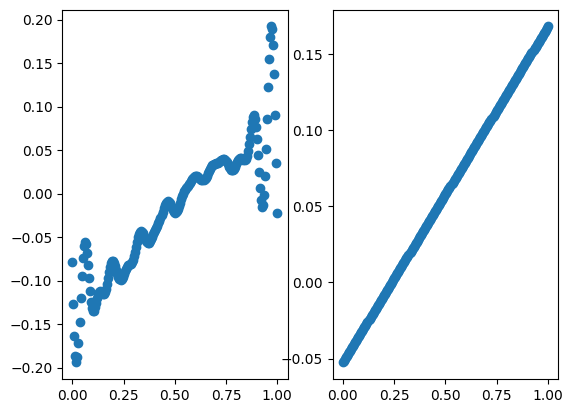

In [34]:
upredt0 = model(torch.cat((beta0_vec, vec), 1))
# print(activation['k0'].shape)

plt.subplot(121)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['k0'][0], axis=0))
plt.subplot(122)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['w0'][0], axis=0))
plt.show()

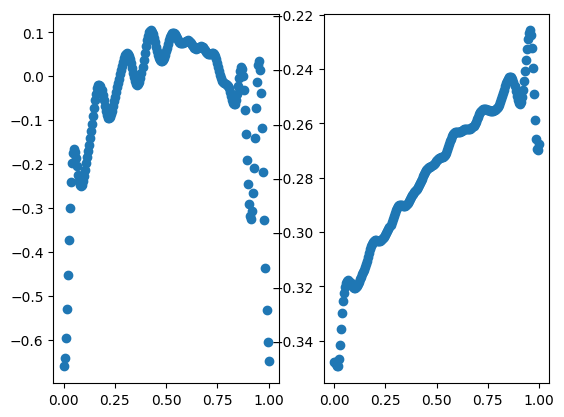

In [35]:
plt.subplot(121)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['k1'][0], axis=0))
plt.subplot(122)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['w1'][0], axis=0))
plt.show()

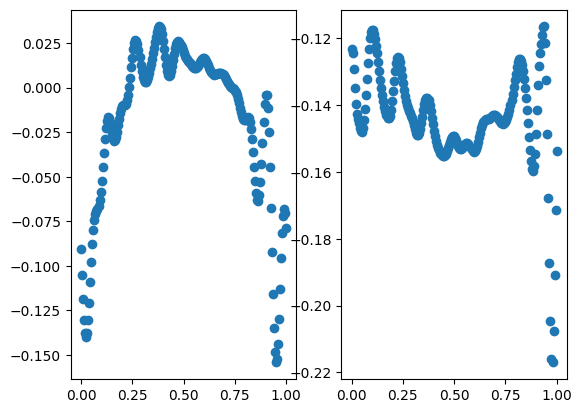

In [36]:
plt.subplot(121)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['k2'][0], axis=0))
plt.subplot(122)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['w2'][0], axis=0))
plt.show()

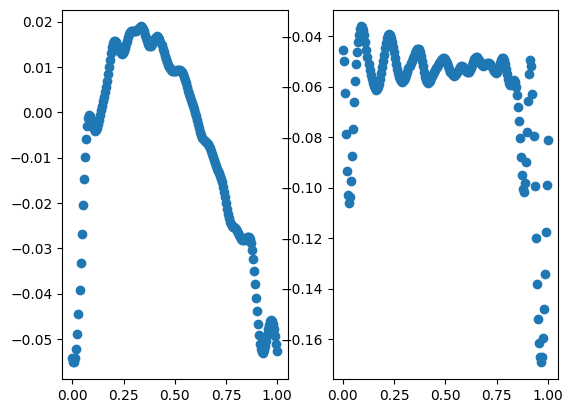

In [37]:
plt.subplot(121)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['k3'][0], axis=0))
plt.subplot(122)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['w3'][0], axis=0))
plt.show()

In [38]:
torch.mean(activation['k0'][0], axis=0)

tensor([-7.8060e-02, -1.2640e-01, -1.6325e-01, -1.8604e-01, -1.9403e-01,
        -1.8830e-01, -1.7150e-01, -1.4745e-01, -1.2046e-01, -9.4769e-02,
        -7.3942e-02, -6.0418e-02, -5.5280e-02, -5.8242e-02, -6.7837e-02,
        -8.1784e-02, -9.7436e-02, -1.1225e-01, -1.2418e-01, -1.3197e-01,
        -1.3523e-01, -1.3441e-01, -1.3060e-01, -1.2522e-01, -1.1972e-01,
        -1.1527e-01, -1.1259e-01, -1.1179e-01, -1.1251e-01, -1.1394e-01,
        -1.1514e-01, -1.1520e-01, -1.1347e-01, -1.0973e-01, -1.0419e-01,
        -9.7476e-02, -9.0496e-02, -8.4241e-02, -7.9593e-02, -7.7156e-02,
        -7.7144e-02, -7.9351e-02, -8.3203e-02, -8.7882e-02, -9.2485e-02,
        -9.6199e-02, -9.8442e-02, -9.8952e-02, -9.7808e-02, -9.5380e-02,
        -9.2225e-02, -8.8950e-02, -8.6072e-02, -8.3916e-02, -8.2545e-02,
        -8.1768e-02, -8.1190e-02, -8.0320e-02, -7.8687e-02, -7.5960e-02,
        -7.2027e-02, -6.7038e-02, -6.1382e-02, -5.5623e-02, -5.0391e-02,
        -4.6266e-02, -4.3671e-02, -4.2793e-02, -4.3